In [1]:
%pip install seaborn
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import ast
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud

Matplotlib is building the font cache; this may take a moment.


In [2]:
print(os.getcwd())

/drive/notebooks


In [3]:
file_path="/drive/notebooks/cleaned3.csv"
data=pd.read_csv(file_path)

In [4]:
data.head()

,title_normalized,company,rating,pay_percentile50,skill,years_of_experience,size,sector,industry,company_type,revenue,yearFounded,date_posted,doctoral,master,bachelor,associate,highschool_ged,years_since_founded,at_heartquartes
0,Data Scientist,"Davidson Technologies, Inc.",4.2,150000.0,"['Computer science', 'MATLAB', 'Data mining', ...",2.0,3,Manufacturing,Transportation Equipment Manufacturing,Company - Private,$25 to $50 million (USD),1996,"Nov 14, 2021",1,1,1,0,0,26,1
1,Senior Data Scientist,The Boeing Company,3.8,178000.0,"['Azure', 'Writing skills', 'R', 'Google Cloud...",3.0,7,Aerospace & Defense,Aerospace & Defense,Company - Public,$10+ billion (USD),1916,"Feb 13, 2022",1,1,1,0,0,106,0
2,Senior Data Analyst,ITAC Solutions,4.1,80173.0,"['Microsoft Excel', 'Salesforce', 'Microsoft S...",4.0,3,Business Services,Staffing & Outsourcing,Company - Private,Unknown / Non-Applicable,2000,"Jan 20, 2022",0,0,1,0,0,22,1
3,Senior Machine Learning Engineer,"CyberCoders, Inc.",4.1,137500.0,"['Machine learning', 'Data collection', 'AI']",5.0,3,Business Services,Staffing & Outsourcing,Subsidiary or Business Segment,$100 to $500 million (USD),1999,"Feb 12, 2022",0,0,0,0,0,23,0
4,Data Scientist,"PayPal, Inc.",4.1,116130.0,"['Data structures', 'R', 'Data analysis skills...",0.0,7,Information Technology,Internet,Company - Public,$10+ billion (USD),1998,"Feb 09, 2022",0,0,1,0,0,24,0


In [5]:
avg_pay = data.groupby('title_normalized')['pay_percentile50'].median().sort_values(ascending=False)
top20_jobs=avg_pay.head(20)

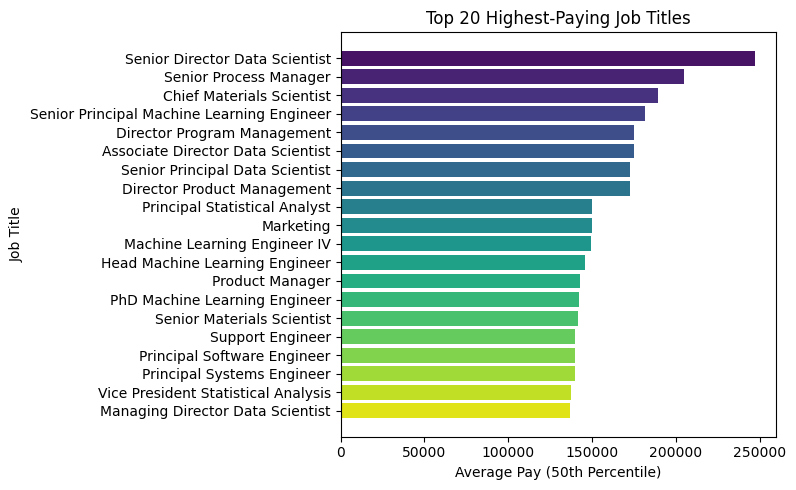

In [8]:
# Generate a color palette using seaborn
palette = sns.color_palette("viridis", len(top20_jobs))  # Change 'viridis' to any palette you like

# Plot with matplotlib's barh
plt.figure(figsize=(8, 5))
plt.barh(top20_jobs.index, top20_jobs.values, color=palette)
plt.title("Top 20 Highest-Paying Job Titles", fontsize=12)
plt.xlabel("Average Pay (50th Percentile)", fontsize=10)
plt.ylabel("Job Title", fontsize=10)
plt.gca().invert_yaxis()  # To keep the highest values at the top
plt.tight_layout()
plt.show()


In [11]:
data_job = data[(data['title_normalized'].str.contains("Data Scientist", na=False)) | 
                 (data['title_normalized'].str.contains("Machine Learning", na=False))]

In [12]:
data_job

,title_normalized,company,rating,pay_percentile50,skill,years_of_experience,size,sector,industry,company_type,revenue,yearFounded,date_posted,doctoral,master,bachelor,associate,highschool_ged,years_since_founded,at_heartquartes
0,Data Scientist,"Davidson Technologies, Inc.",4.2,150000.0,"['Computer science', 'MATLAB', 'Data mining', ...",2.0,3,Manufacturing,Transportation Equipment Manufacturing,Company - Private,$25 to $50 million (USD),1996,"Nov 14, 2021",1,1,1,0,0,26,1
1,Senior Data Scientist,The Boeing Company,3.8,178000.0,"['Azure', 'Writing skills', 'R', 'Google Cloud...",3.0,7,Aerospace & Defense,Aerospace & Defense,Company - Public,$10+ billion (USD),1916,"Feb 13, 2022",1,1,1,0,0,106,0
3,Senior Machine Learning Engineer,"CyberCoders, Inc.",4.1,137500.0,"['Machine learning', 'Data collection', 'AI']",5.0,3,Business Services,Staffing & Outsourcing,Subsidiary or Business Segment,$100 to $500 million (USD),1999,"Feb 12, 2022",0,0,0,0,0,23,0
4,Data Scientist,"PayPal, Inc.",4.1,116130.0,"['Data structures', 'R', 'Data analysis skills...",0.0,7,Information Technology,Internet,Company - Public,$10+ billion (USD),1998,"Feb 09, 2022",0,0,1,0,0,24,0
5,Data Scientist,COLSA Corporation,4.4,110649.0,"['TensorFlow', 'CI/CD', 'Data structures', 'C#...",0.0,5,Business Services,Research & Development,Company - Private,$100 to $500 million (USD),1980,"Feb 15, 2022",0,0,1,0,0,42,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,Senior Data Scientist,Food Management Search,-0.1,120637.0,"['Cash flow analysis', 'D3.js', 'Spark', 'Data...",1.0,1,Business Services,Staffing & Outsourcing,Company - Private,Unknown / Non-Applicable,2000,"Jan 06, 2022",1,0,0,0,0,22,0
2703,Data Scientist,"Aurora Innovation, Inc.",3.9,118377.0,"['SQL', 'Math', 'Machine learning', 'Algebra',...",3.0,3,Information Technology,Computer Hardware & Software,Company - Public,Unknown / Non-Applicable,2017,"Jan 26, 2022",1,1,0,0,0,5,0
2704,Senior Data Scientist,Onto Innovation,3.1,126597.0,"['TensorFlow', 'MATLAB', 'Signal processing', ...",3.0,5,Manufacturing,Industrial Manufacturing,Company - Public,Unknown / Non-Applicable,2019,"May 25, 2021",1,0,0,0,0,3,0
2705,Data Scientist,Xerox Corporation,3.3,125698.0,"['TensorFlow', 'Signal processing', 'Internet ...",2.0,7,Information Technology,IT Services,Company - Public,$5 to $10 billion (USD),1906,"Jan 28, 2022",0,0,0,0,0,116,0


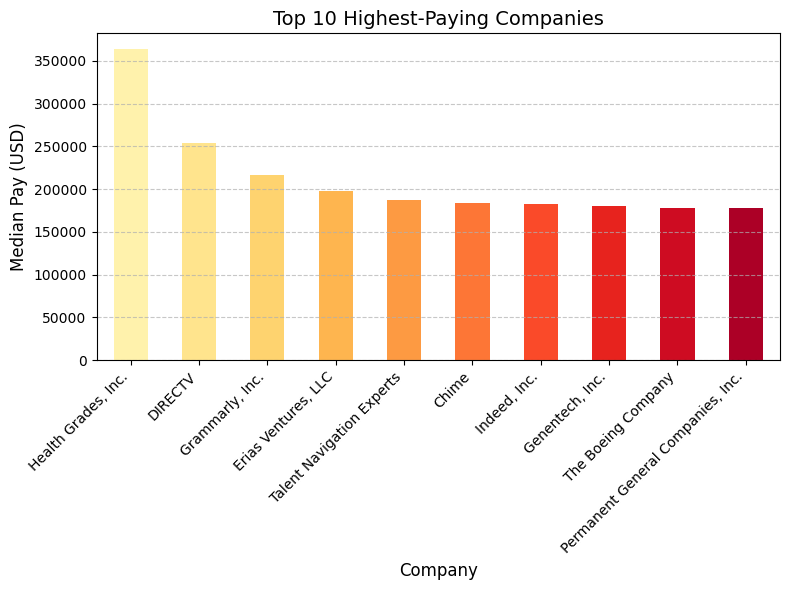

In [13]:
highest_paying_companies = (
    data_job.groupby('company')['pay_percentile50'].median().sort_values(ascending=False).head(10)  # Select the top 10 highest-paying companies
)

# Plot the highest-paying companies as a bar chart
plt.figure(figsize=(8, 6))
highest_paying_companies.plot(kind='bar',color=sns.color_palette("YlOrRd", len(highest_paying_companies)))
plt.title("Top 10 Highest-Paying Companies", fontsize=14)
plt.xlabel("Company", fontsize=12)
plt.ylabel("Median Pay (USD)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


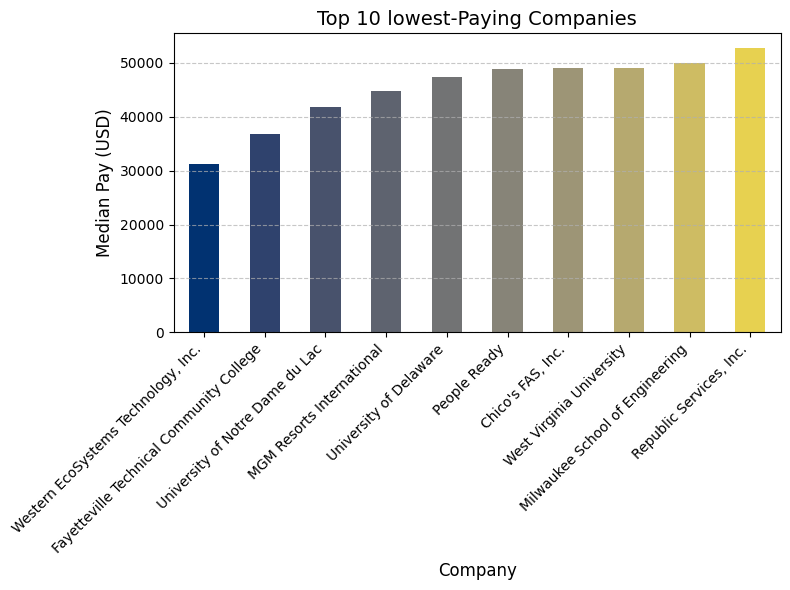

In [14]:
lowest_paying_companies = (
    data_job.groupby('company')['pay_percentile50'].median().sort_values(ascending=True).head(10)  # Select the top 10 highest-paying companies
)
palette = sns.color_palette('RdBu')
# Plot the highest-paying companies as a bar chart
plt.figure(figsize=(8, 6))
lowest_paying_companies.plot(kind='bar', color=sns.color_palette("cividis", len(lowest_paying_companies)))
plt.title("Top 10 lowest-Paying Companies", fontsize=14)
plt.xlabel("Company", fontsize=12)
plt.ylabel("Median Pay (USD)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

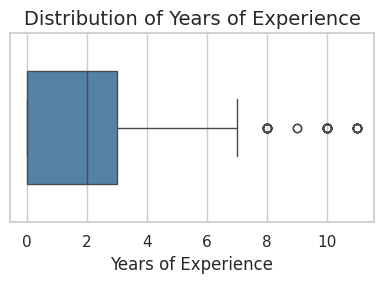

In [17]:

# Set the style for the plot
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(4, 3))
sns.boxplot(x='years_of_experience', data=data_job, color='steelblue', width=0.6)

# Customize the plot
plt.title("Distribution of Years of Experience", fontsize=14)
plt.xlabel("Years of Experience", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


In [18]:
industry_demand=data_job['industry'].value_counts()

In [19]:
industry_demand1=pd.DataFrame(industry_demand)

In [20]:
skill_series = data['skill'].dropna().apply(ast.literal_eval)

In [21]:
all_skills = [skill for skills in skill_series for skill in skills]

In [22]:
skill_count = Counter(all_skills)

In [23]:
top_skills = skill_count.most_common(20)

In [24]:
skills, counts = zip(*top_skills)

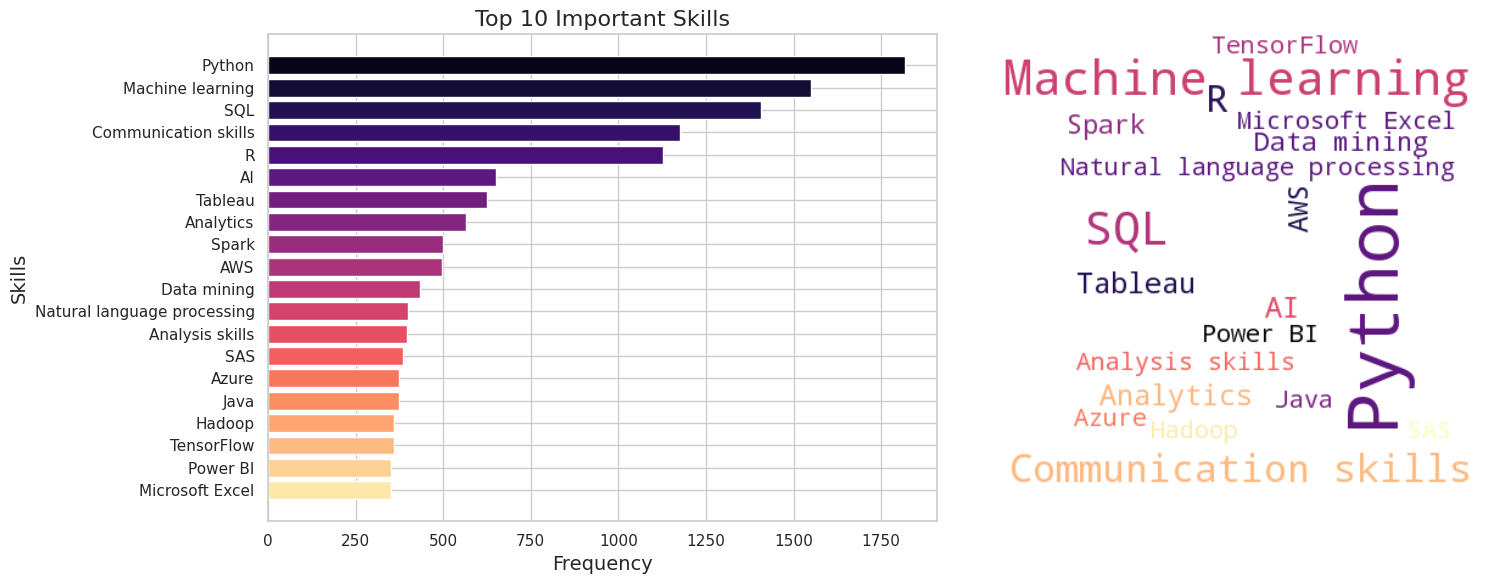

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns  # Import for color palette

# Assuming 'skills' and 'counts' are defined

# Create subplots for side-by-side visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# ---------- Bar chart ----------
# Use Seaborn's 'YlGnBu' palette for the bars
ax1.barh(skills, counts, color=sns.color_palette("magma", len(skills)))
ax1.set_xlabel('Frequency', fontsize=14)
ax1.set_ylabel('Skills', fontsize=14)
ax1.set_title('Top 10 Important Skills', fontsize=16)
ax1.invert_yaxis()  # Invert y-axis for better readability

# ---------- Word cloud ----------
skills_counts = {skill: count for skill, count in zip(skills, counts)}
wordcloud = WordCloud(
    width=400, height=400, background_color='white', colormap='magma'
).generate_from_frequencies(skills_counts)
ax2.imshow(wordcloud, interpolation='bilinear')
ax2.axis('off')  # Remove axes

# Adjust layout
plt.tight_layout()
plt.show()

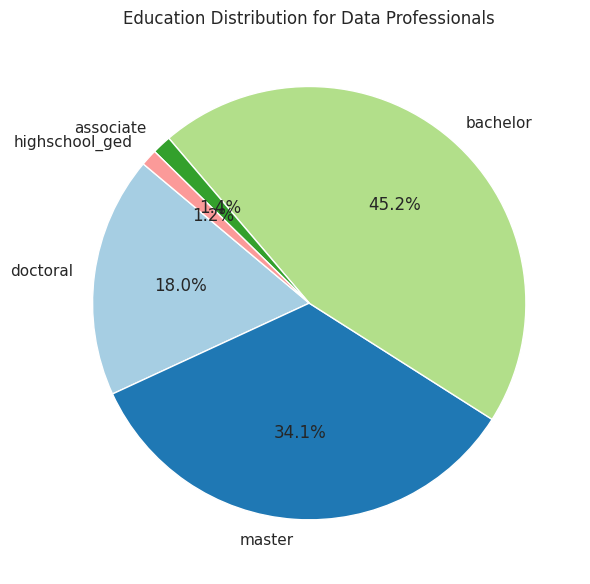

In [35]:
edu_col= ['doctoral','master','bachelor','associate','highschool_ged']
edu_counts=data[edu_col].sum()
plt.figure(figsize=(10,6))
plt.pie(edu_counts.values,labels=edu_counts.index,autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Education Distribution for Data Professionals', fontsize=12)
plt.tight_layout()
plt.show()

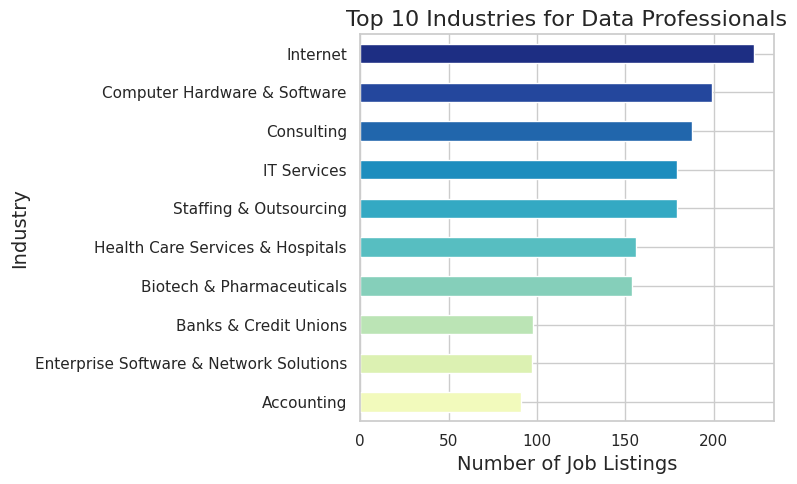

In [37]:

industry_counts = data['industry'].value_counts().head(10)

# Visualizing the top 10 industries using a horizontal bar chart
plt.figure(figsize=(8, 5))
industry_counts.sort_values().plot(kind='barh', color=sns.color_palette("YlGnBu", len(industry_counts)))
plt.xlabel('Number of Job Listings', fontsize=14)
plt.ylabel('Industry', fontsize=14)
plt.title('Top 10 Industries for Data Professionals', fontsize=16)
plt.tight_layout()
plt.show()


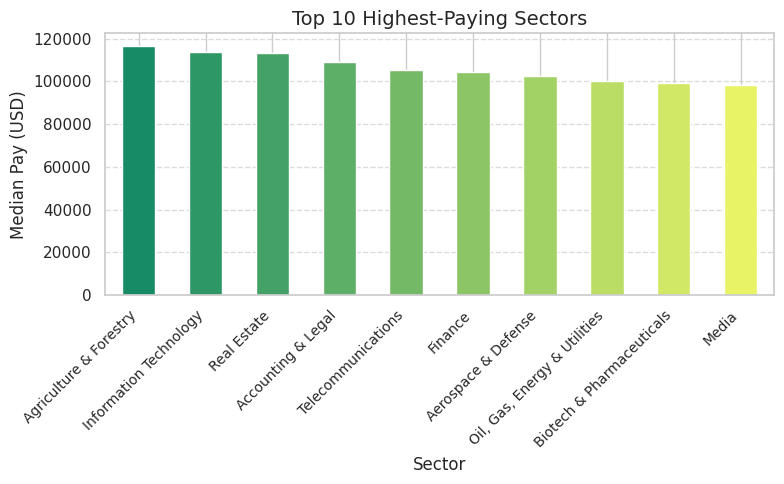

In [38]:

highest_paying_sectors = (
    data_job.groupby('sector')['pay_percentile50']
    .median()
    .sort_values(ascending=False)
    .head(10)  # Top 10 highest-paying sectors
)

# Plot the highest-paying sectors as a bar chart
plt.figure(figsize=(8, 5))
highest_paying_sectors.plot(kind='bar', color=sns.color_palette("summer", len(highest_paying_sectors)))
plt.title("Top 10 Highest-Paying Sectors", fontsize=14)
plt.xlabel("Sector", fontsize=12)
plt.ylabel("Median Pay (USD)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


<Figure size 600x600 with 0 Axes>

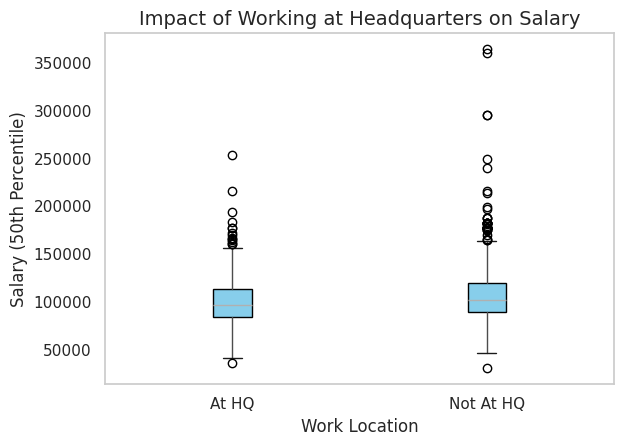

In [39]:
# Filter relevant columns for analysis
hq_salary_data = data_job[['at_heartquartes', 'pay_percentile50']].dropna()

# Replace numerical codes with labels for clarity
hq_salary_data['at_heartquartes'] = hq_salary_data['at_heartquartes'].replace({1: 'At HQ', 0: 'Not At HQ'})

# Visualize using a box plot
plt.figure(figsize=(6, 6))
hq_salary_data.boxplot(by='at_heartquartes', column=['pay_percentile50'], grid=False, patch_artist=True, 
                       boxprops=dict(facecolor="skyblue"))
plt.title('Impact of Working at Headquarters on Salary', fontsize=14)
plt.suptitle('')  # Remove the default subplot title
plt.xlabel('Work Location', fontsize=12)
plt.ylabel('Salary (50th Percentile)', fontsize=12)
plt.tight_layout()
plt.show()
